In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

from scipy import stats

## SCIF30003: Advanced Data Science for Scientific Computing

## I have chosen option 2!

First we will start by using some exploratory techniques on the data set to try and find some relationships between the varaibles and to make sure the data is cleaned up so that it can be used for some regression models.

In [52]:
#Reading in the data
data = pd.read_csv("Option2.csv")
data.head();
data.shape;
data.columns.values


array(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TI', 'TA', 'TEY', 'CDP', 'CO',
       'Nox'], dtype=object)

The META DATA : 
- Ambient temperature AT 'C
- Ambient pressure AP mbar
- Ambient humidity AH %
- Air filter difference pressure AFDP mbar
- Gas turbine exhaust pressure GTEP mbar
- Turbine inlet temperature TI 'C 
- Turbine after temperature TA 'C
- Compressor discharge pressure CDP mbar
- Turbine energy yield TEY MWH
- Carbon monoxide CO mg/m^3
- Nitrogen oxides NOx mg/m^3


In [53]:
print(data.info())
print("\n")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7137 entries, 0 to 7136
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7137 non-null   float64
 1   AP      7137 non-null   float64
 2   AH      7137 non-null   float64
 3   AFDP    7137 non-null   float64
 4   GTEP    7137 non-null   float64
 5   TI      7137 non-null   float64
 6   TA      7137 non-null   float64
 7   TEY     7137 non-null   float64
 8   CDP     7137 non-null   float64
 9   CO      7137 non-null   float64
 10  Nox     7137 non-null   float64
dtypes: float64(11)
memory usage: 613.5 KB
None


                AT           AP           AH         AFDP         GTEP  \
count  7137.000000  7137.000000  7137.000000  7137.000000  7137.000000   
mean     18.218510  1012.368340    82.143549     3.914773    25.756788   
std       7.005071     5.974949    13.019411     0.711943     3.679943   
min       1.144400   994.840000    25.987000     2.151700    17.93

We can see from the describe function that some of the varaibles have max values which are significantly larger than 3 std from the mean. This data distribution can be modelled using various plotting techniques such as box plots, violin plots and histograms.

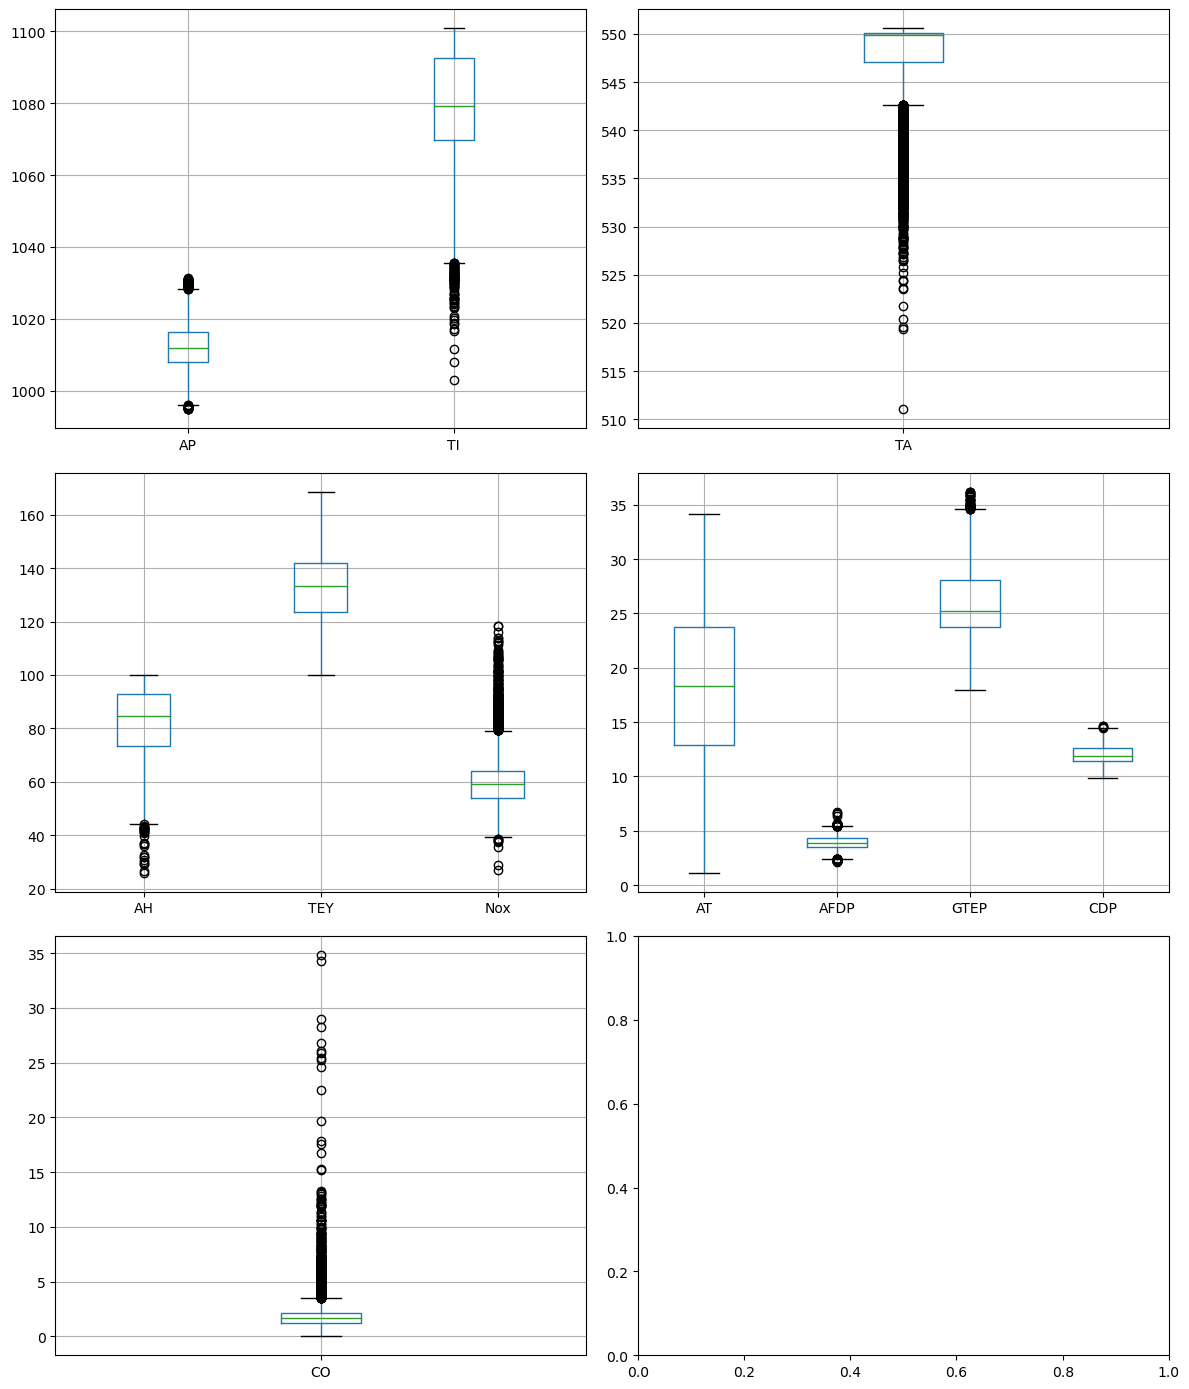

In [54]:
fig,ax = plt.subplots(3,2,figsize=(12,14))
data.boxplot(column=[ 'AP', 'TI', ],ax=ax[0][0]);

data.boxplot(column=['TA' ],ax=ax[0][1]);

data.boxplot(column=['AH', 'TEY', 'Nox'],ax=ax[1][0]);

data.boxplot(column=['AT', 'AFDP', 'GTEP', 'CDP'],ax=ax[1][1]);

data.boxplot(column=['CO'],ax=ax[2][0]);


plt.tight_layout()

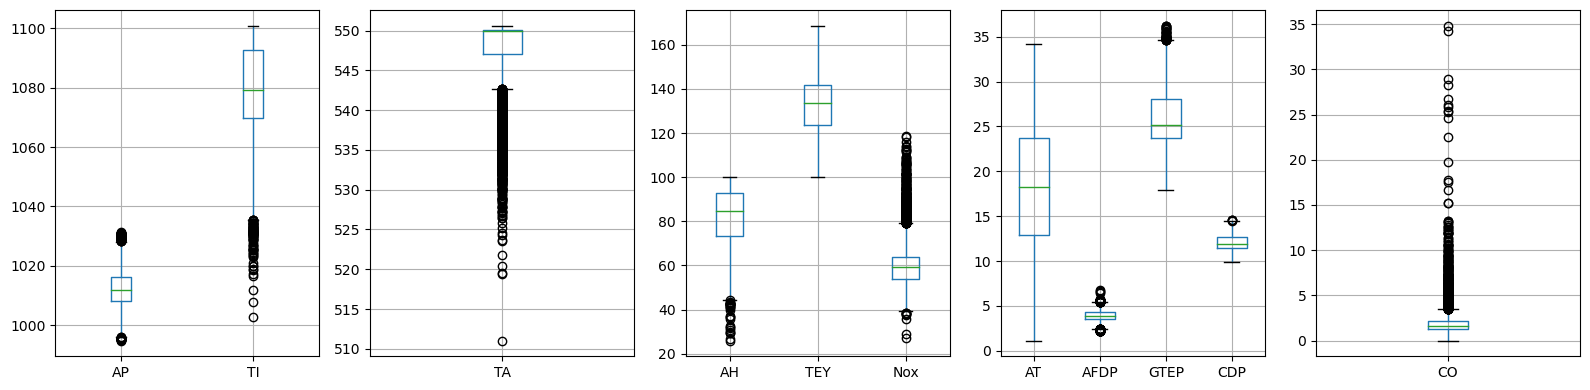

In [55]:
fig,ax = plt.subplots(1,5,figsize=(16,4))
data.boxplot(column=[ 'AP', 'TI', ],ax=ax[0]);

data.boxplot(column=['TA' ],ax=ax[1]);

data.boxplot(column=['AH', 'TEY', 'Nox'],ax=ax[2]);

data.boxplot(column=['AT', 'AFDP', 'GTEP', 'CDP'],ax=ax[3]);

data.boxplot(column=['CO'],ax=ax[4]);

plt.tight_layout()

From the box plots we can see that there are lots of values that are considered "outliers". We therefore need to investiagte these values a bit more and will use violin plots to see how the data behaves towards these outlying points.

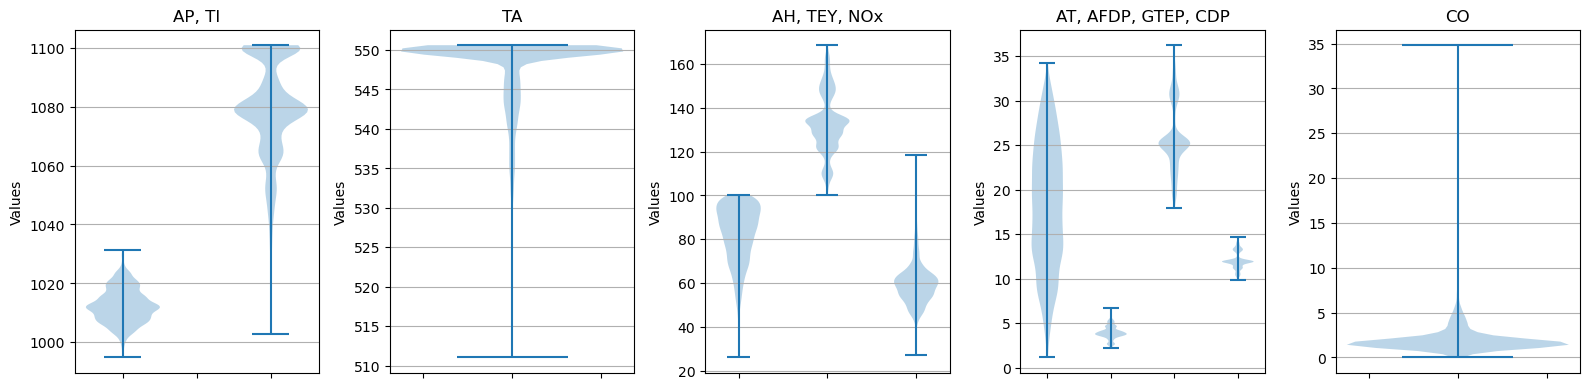

In [56]:
fig,ax = plt.subplots(1,5,figsize=(16,4))
ax[0].violinplot(dataset = [data["AP"].values, data["TI"].values])
ax[0].set_title('AP, TI')
ax[0].yaxis.grid(True)
ax[0].set_ylabel('Values')
ax[0].xaxis.set_tick_params(labelbottom=False)

ax[1].violinplot(dataset = [data["TA"].values])
ax[1].set_title('TA')
ax[1].yaxis.grid(True)
ax[1].xaxis.set_tick_params(labelbottom=False)
ax[1].set_ylabel('Values')

ax[2].violinplot(dataset = [data["AH"].values, data["TEY"].values, data["Nox"].values])
ax[2].set_title('AH, TEY, NOx')
ax[2].yaxis.grid(True)
ax[2].xaxis.set_tick_params(labelbottom=False)
ax[2].set_ylabel('Values')

ax[3].violinplot(dataset = [data["AT"].values, data["AFDP"].values, data["GTEP"].values, data["CDP"].values])
ax[3].set_title('AT, AFDP, GTEP, CDP')
ax[3].xaxis.set_tick_params(labelbottom=False)
ax[3].yaxis.grid(True)
ax[3].set_ylabel('Values')

ax[4].violinplot(dataset = [data["CO"].values])
ax[4].set_title('CO')
ax[4].yaxis.grid(True)
ax[4].xaxis.set_tick_params(labelbottom=False)
ax[4].set_ylabel('Values')

plt.tight_layout()

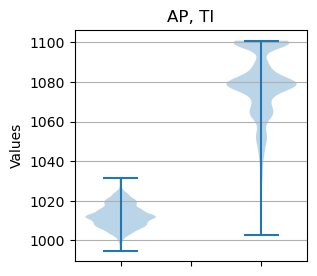

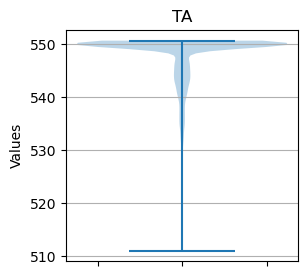

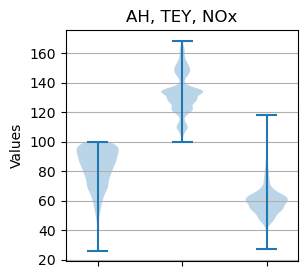

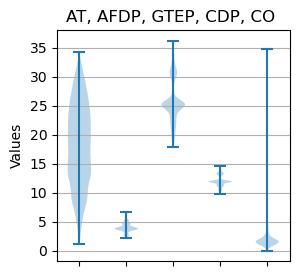

In [57]:
fig, axes = plt.subplots(figsize=(3,3))
axes.violinplot(dataset = [data["AP"].values,
                           
                           data["TI"].values])
axes.set_title('AP, TI')
axes.yaxis.grid(True)
axes.set_ylabel('Values')
axes.xaxis.set_tick_params(labelbottom=False)
plt.show()

fig, axes = plt.subplots(figsize=(3,3))
axes.violinplot(dataset = [data["TA"].values])
axes.set_title('TA')
axes.yaxis.grid(True)
axes.xaxis.set_tick_params(labelbottom=False)
axes.set_ylabel('Values')
plt.show()

fig, axes = plt.subplots(figsize=(3,3))
axes.violinplot(dataset = [data["AH"].values,
                           data["TEY"].values,
                           data["Nox"].values])
axes.set_title('AH, TEY, NOx')
axes.yaxis.grid(True)
axes.xaxis.set_tick_params(labelbottom=False)
axes.set_ylabel('Values')
plt.show()

fig, axes = plt.subplots(figsize=(3,3))
axes.violinplot(dataset = [data["AT"].values,
                           data["AFDP"].values,
                           data["GTEP"].values,
                           data["CDP"].values,
                           data["CO"].values])
axes.set_title('AT, AFDP, GTEP, CDP, CO ')
axes.xaxis.set_tick_params(labelbottom=False)
axes.yaxis.grid(True)
axes.set_ylabel('Values')
plt.show()

From these plots we can see that most of the distriubtions are not unimodal or normal. Some of them are tri-modal, some have slopes that lead off into tails. 
The most significant plots to look at are CO as this has large gaps between the median of the data and some data points. NOx and TA are similar however not such a large significance compared to CO

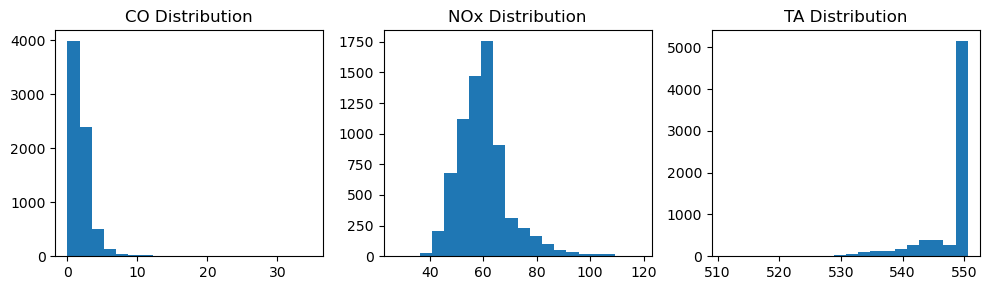

In [58]:
fig, ax = plt.subplots(1,3,figsize=(10,3))

ax[0].hist(x=data["CO"],bins=20)
ax[0].set_title("CO Distribution")
ax[1].hist(x=data["Nox"],bins=20)
ax[1].set_title("NOx Distribution")
ax[2].hist(x=data["TA"],bins=20)
ax[2].set_title("TA Distribution")

plt.tight_layout()

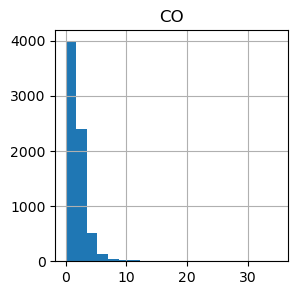

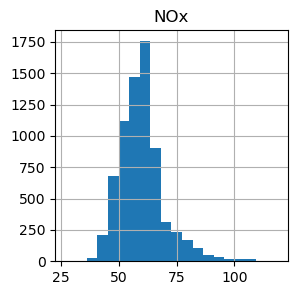

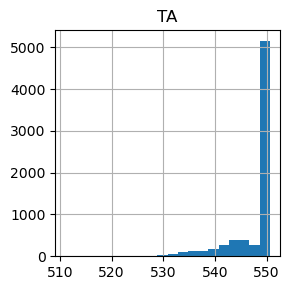

In [59]:
# Plotting hists.
fig, ax = plt.subplots(figsize=(3,3))
data["CO"].hist(bins=20);
plt.title("CO")
fig, ax = plt.subplots(figsize=(3,3))
data["Nox"].hist(bins=20);
plt.title("NOx")
fig, ax = plt.subplots(figsize=(3,3))
data["TA"].hist(bins=20);
plt.title("TA")
plt.tight_layout()

We can see frmo these plots that the values at the extremes of TA and CO are significantly unlikely in the data. We can therefore make the decision to start to clean up the data for the values which are significantly far away from the mean. 

In [60]:
#Data cleaning
old_data = data
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

We have now cleaned the data by removing all the data points which lie outside of 3 std of the mean value.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6766 entries, 0 to 7134
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6766 non-null   float64
 1   AP      6766 non-null   float64
 2   AH      6766 non-null   float64
 3   AFDP    6766 non-null   float64
 4   GTEP    6766 non-null   float64
 5   TI      6766 non-null   float64
 6   TA      6766 non-null   float64
 7   TEY     6766 non-null   float64
 8   CDP     6766 non-null   float64
 9   CO      6766 non-null   float64
 10  Nox     6766 non-null   float64
dtypes: float64(11)
memory usage: 634.3 KB


Can see that we have lost around 1000 data points. Due to the size of the dataset we are not too worried about the loss of data. Especially if it is in the interest of improving predictive results.

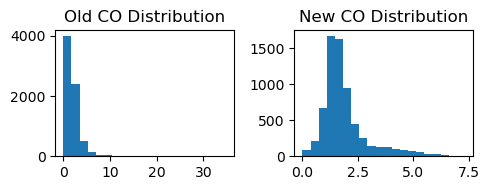

In [62]:
fig, ax = plt.subplots(1,2,figsize=(5,2))

ax[0].hist(x=old_data["CO"],bins=20)
ax[0].set_title("Old CO Distribution")

ax[1].hist(x=data["CO"],bins=20)
ax[1].set_title("New CO Distribution")

plt.tight_layout()

We can see from these two histograms the reduction in the spread of data of out dataframe.

### Using Correlations to try to identify the relationships in the data

Starting with plotting a correlation matrix of the data

Text(0.5, 1.0, 'Correlation Matrix')

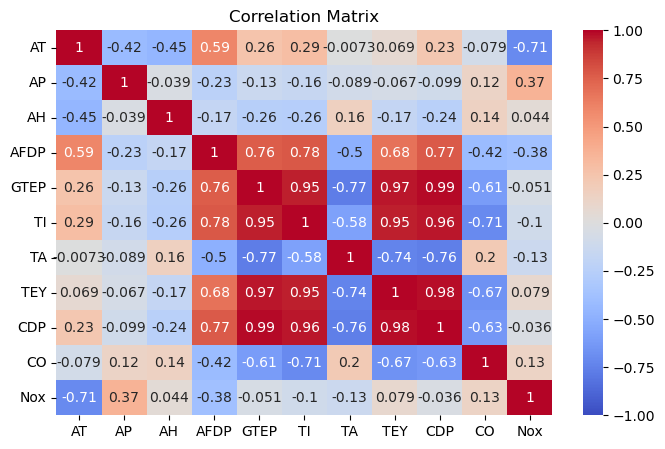

In [63]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(), annot=True,ax=ax,cmap="coolwarm",vmin=-1,vmax=1);
ax.set(xlabel="", ylabel="");
ax.set_title("Correlation Matrix")

From the matrix plot we can see that there are lots of varaibles which are highly correlated to eachother.
We should focus on the correlations of the response variables CO and NOx. Their correlation coefficients are printed below:

AT     -0.705521
AP      0.365523
AH      0.044129
AFDP   -0.384277
GTEP   -0.051095
TI     -0.100787
TA     -0.132789
TEY     0.079051
CDP    -0.036052
CO      0.130405
Nox     1.000000
Name: Nox, dtype: float64


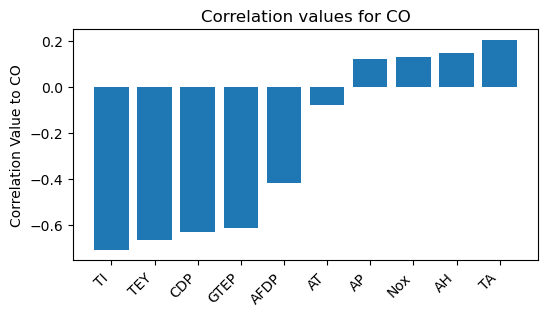

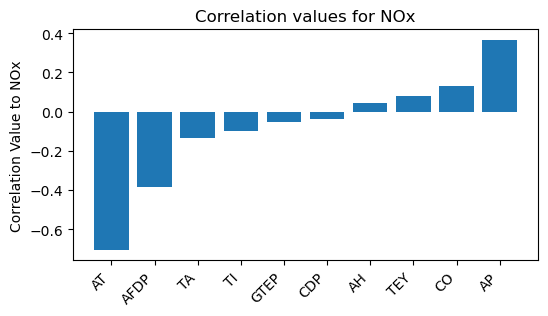

In [64]:
plt.figure(figsize=(6,3))
corr = data.corr()["CO"].sort_values()
print(data.corr()["Nox"])

plt.bar(corr.index.values[:-1],corr.values[:-1])
plt.title("Correlation values for CO")
plt.ylabel("Correlation Value to CO")
plt.xticks(rotation=45, ha='right')
plt.show()

corr = data.corr()["Nox"].sort_values()
plt.figure(figsize=(6,3))
plt.bar(corr.index.values[:-1],corr.values[:-1])
plt.title("Correlation values for NOx")
plt.ylabel("Correlation Value to NOx")
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that the CO calue has a good number of highly correlated (>0.6) values. This is a good indication that this data will be able to make a decent model from this data.
One thing to note is that of all of the significant correlations are negative meaning that as they go down the CO goes up.
We can see from the matrix plot above that many of these significant correlations are highly correlated together. This is not awful however when building certain models it is better for the inputs to be significantly independent. It could therefore be useful to drop some of the terms which are highly correlated to the other ones to stop multilinearity problems.

NOx has significantly lower correlation to the data set as a whole with the only varaible above (0.6) being AT which is negatively correlated. This may make building a model for this reponse easier as a simple linear regression should be able to compete with the other models. 

We can see from the correlations that NOx and CO are hardly correlated. This means that a model type that works the best for one of them may not work for the other and therefore a few models should be used for each in order to create the best predictive models.

### PCA To investigate higher dimensional relationships in the data

In [65]:
df = data.iloc[:,:-2] #Not including our response varaibles as want to compare these to the PCA

#First we will standardize the data
X_std = StandardScaler().fit_transform(df)

#Create our PCA 
pca = PCA(n_components=9)

#Fit the PCA and save the components to a new dataframe
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)

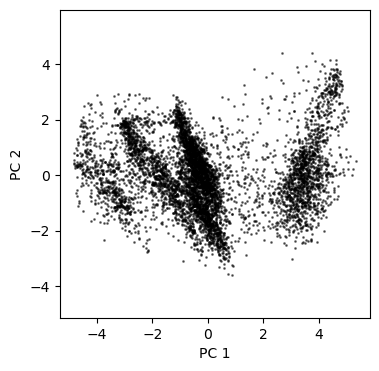

In [66]:
fig, ax = plt.subplots(figsize=(4,4))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.5, s=1, color='black')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal');

From this PCA we can clearly see that there are some general clusters appearing. I would say that there are roughly four clusters appearing in the 2D plot. However when introducing a 3d dimension it could appear that there are more clusters in the data. We can see how significant the different components are which can help to make a judgement on whether to use 2 or 3 PCA components to visualise this data.

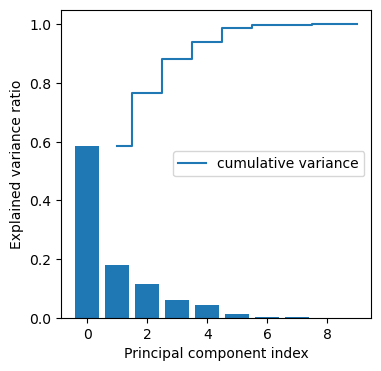

In [67]:
fig, ax = plt.subplots(figsize=(4,4))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_,)
plt.step(range(1,10),  np.cumsum(pca.explained_variance_ratio_) , where='mid',label='cumulative variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

This plot shows us the significance of each of the principle components. THe first compoent explains 60% of the variance in the data and the second explaining 20%. This means that when using both of these components in a 2D plot we are able to see 80% of the varaince in the data, which is quite good. In 3D we get 90% which is not a significant increase in varaiance explained when going frmo 80 -> 90 cmopared to 60 -> 80. This third component can be considered optional to use to look at the data, however it wont make a significant amount of difference and when plotting in 3D, understanding the data can be significantly harder than in 2D. We shall plot both anyway but focus on the 2D plots.

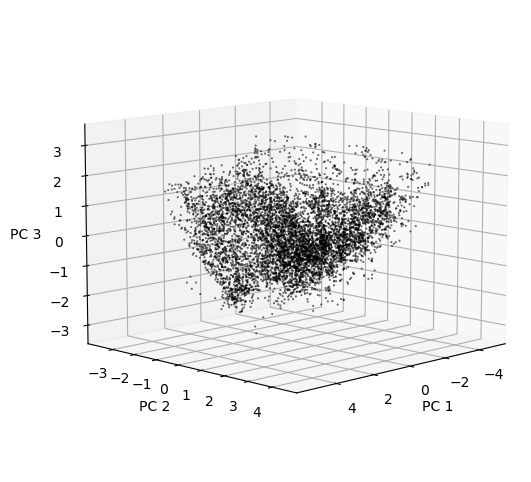

In [68]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], alpha=.7,c = "black", marker='o', s=0.2)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
ax.set_zlabel("PC 3")
ax.view_init(10, 45)

From the 3D plot we can make out the same 4-ish clusters that were seen in the 2 dimensional plot. There is no significant change for this 3D plot when compared to the 2D as expected frmo above.

At the moment we are seeing these distributions as one solid colour. However we want to get an insight into how these clusters relate to our response varaibles CO and NOx. Since we are dealing with clustering, we would like to create some class data for CO and NOx in order to colour plot the PCA plot. To do this we will just create bins in the data. Since we can see 4 clusters we are going to split the data into 4 classes.

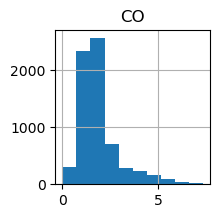

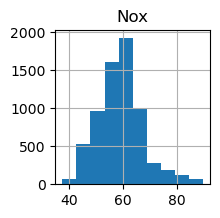

In [69]:
data.hist(column="CO",figsize=(2,2));
data.hist(column="Nox", figsize=(2,2));

In [70]:
#Binning the data to makes classes, want the bins to be roughly equaly sized.
data["CO_Level"] = 0
data["CO_Level"].loc[data["CO"]>1] = 1
data["CO_Level"].loc[data["CO"]>2] = 2
data["CO_Level"].loc[data["CO"]>3] = 3
CO_levels = data["CO_Level"];
data=data.drop(columns="CO_Level");

data["Nox_Level"] = 0
data["Nox_Level"].loc[data["Nox"]>50] = 1
data["Nox_Level"].loc[data["Nox"]>60] = 2
data["Nox_Level"].loc[data["Nox"]>70] = 3
Nox_levels = data["Nox_Level"];
data=data.drop(columns="Nox_Level");

c:\Users\georg\anaconda3\envs\tdaf-tf2p7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\georg\anaconda3\envs\tdaf-tf2p7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Now that the classes have been made we can plot our PCA with a colour map ontop

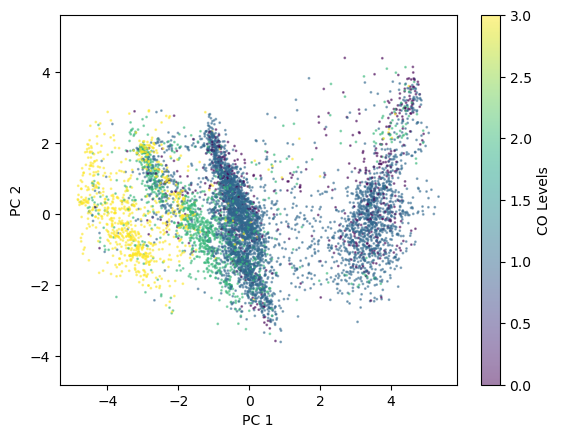

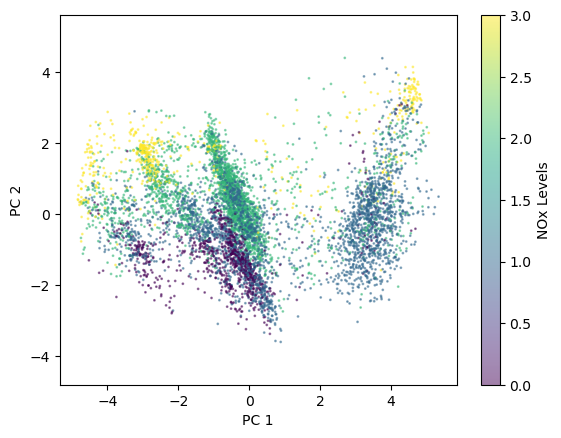

In [71]:
fig, ax = plt.subplots()
sc = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5,s=1, c=CO_levels.values)
cbar = fig.colorbar(sc)
cbar.set_label('CO Levels')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.axis('equal');

fig, ax = plt.subplots()
sc = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5,s=1, c=Nox_levels.values)
cbar = fig.colorbar(sc)
cbar.set_label('NOx Levels')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.axis('equal');

From these plots we can see that the CO values are determined more by the first principle component, this is shown by the change in colour along the x axis, with a smaller value of PC1 leading to a grater value in CO.

For NOx however, the second principle component seems to be ther determining factor to the level of NOx. Where the higher the value of PC2 the higher the value in NOx.

We can look at the component weights in each principle component in order to find out which varaibles explain most of the varaince in the data and therefore which varaibles effect NOx more or CO more due to the discovery that CO is related to PC1 and NOx is related to PC2.

In [72]:
comps = pca.components_
print(data.columns[:-2].values)

print("Principle Components 1 weights = ")
print(comps[0])

['AT' 'AP' 'AH' 'AFDP' 'GTEP' 'TI' 'TA' 'TEY' 'CDP']
Principle Components 1 weights = 
[ 0.15636121 -0.07246005 -0.1349493   0.36432259  0.42923972  0.41637271
 -0.32804746  0.41198534  0.42941637]


In [73]:
print(data.columns[:-2].values)

print("Principle Components 2 weights = ")
print(comps[1])

['AT' 'AP' 'AH' 'AFDP' 'GTEP' 'TI' 'TA' 'TEY' 'CDP']
Principle Components 2 weights = 
[-0.6759043   0.50387967  0.31373362 -0.2190684   0.08013565  0.01574926
 -0.2907788   0.2016945   0.10457605]


From this data we can see that the variables mainly responsible for PC1 and therefore 60% of the variance are : CDP, TEY, TA, TI, GTEP, AFDP and also these are the main effectors on the CO which agrees with the correlatino plots from earlier.

variables mainly responsible for PC2 and therefore 20% of the variance are : AT AP and AFDP, and therefore these are the main effectors on NOx. Which is also in agreement with earlier.

We can plot these same distributions for the 3D plots however they do not make a clear visualisation like the 2D ones do.

In [74]:
levels = [0, 1, 2, 3, 4]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N)

Text(0.5, 0.92, 'Nox')

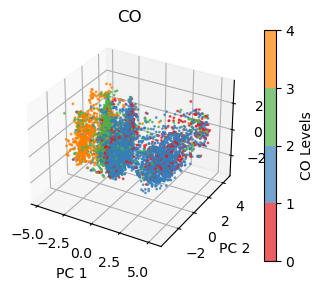

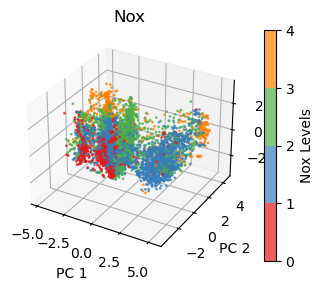

In [75]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], alpha=.7, c=CO_levels.values, cmap='Set1', marker='o', s=1,norm=norm)
cbar = fig.colorbar(sc)
cbar.set_label('CO Levels')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("CO")

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2], alpha=.7, c=Nox_levels.values, cmap='Set1', marker='o', s=1,norm=norm)
cbar = fig.colorbar(sc)
cbar.set_label('Nox Levels')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("Nox")

### Building some Models to predict CO and NOx

In [76]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from math import sqrt

In [77]:
data.head()

,AT,AP,AH,AFDP,GTEP,TI,TA,TEY,CDP,CO,Nox
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


We are prediciting a continous varaible and therefore using a regression models. However it is important to try out a range of models and compare them in order to reach the best model that you can.

### Creating a range of models for predicting CO

In [78]:
#Creating a table to store the accuracy metrics of each model
CO_table = pd.DataFrame(columns=['Model','MSE','MAE','R2'])

In [79]:
#Creating our training and testing datasets and including scaling as this is particularly important for some models
X = data.iloc[:,:-2]
y = data["CO"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Neural Network

In [80]:
model = Sequential()
model.add(Dense(128, input_dim=9, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="linear")) #Output layer

model.compile(loss="mean_squared_error",optimizer="adam", metrics=["mae"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1280      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                

In [81]:
monitor = EarlyStopping(monitor="val_loss",min_delta=1e-3,patience=10,verbose=1,mode="auto")
history = model.fit(X_train_scaled, y_train, validation_split=0.2, verbose=0, epochs=100,callbacks=[monitor])

Epoch 00057: early stopping


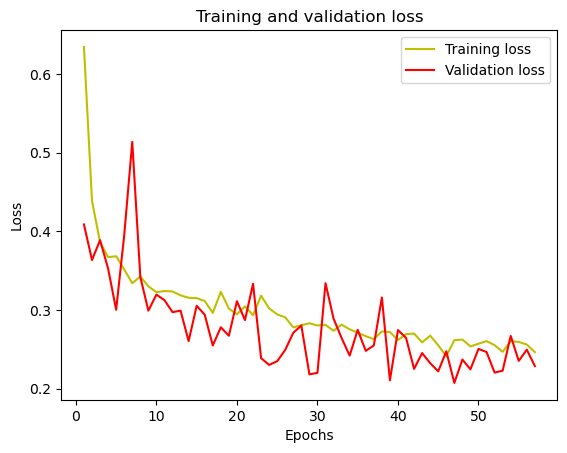

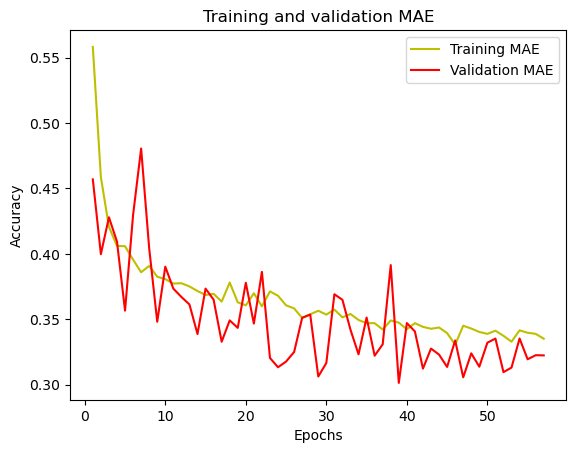

In [82]:
loss = history.history["loss"] #history.history.keys()
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"y",label="Training loss")
plt.plot(epochs, val_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history.history["mae"]
val_acc = history.history["val_mae"]
plt.plot(epochs,acc,"y",label="Training MAE")
plt.plot(epochs, val_acc, "r", label = "Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see from the convergence of the training MAE and the training loss that there is not much more to gain from the number of Epochs. In fact more epochs will lead to overfitting of the model. This overfitting is stopped by using an early stopping function to quit the epoch runs when the significant gain in accuracy starts to become insignificant.

The structure of the neural network was largely down to some trial and error. The dropout layer is also there to reduce the overfitting of the model. This neural network is relatively simple as it is just a few differenty sized dense layers.

In [83]:
#Testing the accuracy
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test,verbose=0)
y_pred_neural = model.predict(X_test_scaled)
r2_neural = r2_score(y_test,y_pred_neural)

print("Mean squared error from NN: ", mse_neural)
print("Mean absolute error from NN: ", mae_neural)
print("R2 score from NN: ", r2_neural)

CO_table.loc[len(CO_table)] = ["NN",mse_neural,mae_neural,r2_neural]

Mean squared error from NN:  0.2405945211648941
Mean absolute error from NN:  0.3414579927921295
R2 score from NN:  0.7948611547981824


#### Linear Regression Model for CO

In [84]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean squared error from LR: ", mse_lr)
print("Mean absolute error from LR: ", mae_lr)
print("R2 Score", r2_lr)

#plt.scatter(y_test, y_pred_lr)

CO_table.loc[len(CO_table)] = ["LR",mse_lr,mae_lr,r2_lr]

Mean squared error from LR:  0.40928769208221
Mean absolute error from LR:  0.4575362691909677
R2 Score 0.6510278044660196


#### CO Decision Tree

In [85]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_dt = tree.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error from DT: ", mse_dt)
print("Mean absolute error from DT: ", mae_dt)
print("R2 score from DT",r2_dt)

CO_table.loc[len(CO_table)] = ["DT",mse_dt,mae_dt,r2_dt]

Mean squared error from DT:  0.4432350506018182
Mean absolute error from DT:  0.41400632644017726
R2 score from DT 0.6220831660995492


#### Random Forest

In [86]:
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print("Mean squared error from RF: ", mse_RF)
print("Mean absolute error from RF: ", mae_RF)
print("R2 score for RF: ", r2_RF)


CO_table.loc[len(CO_table)] = ["RF",mse_RF,mae_RF,r2_RF]

Mean squared error from RF:  0.21790814658975716
Mean absolute error from RF:  0.30138605019694725
R2 score for RF:  0.8142043217735124


#### Evaluation Table of the Models

In [87]:
#Scatter index
CO_table["SI"] = 0;
CO = data["CO"];

for model in CO_table["Model"]:
    SI = round(sqrt(CO_table.loc[CO_table["Model"]==model]["MSE"] / CO.mean() *100),2);
    CO_table["SI"].loc[CO_table["Model"]==model] = SI;

c:\Users\georg\anaconda3\envs\tdaf-tf2p7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
print(data["CO"].std())
CO_table

1.0628835479720078


,Model,MSE,MAE,R2,SI
0,NN,0.240595,0.341458,0.794861,3.56
1,LR,0.409288,0.457536,0.651028,4.64
2,DT,0.443235,0.414006,0.622083,4.83
3,RF,0.217908,0.301386,0.814204,3.39


### Creating models to predict NOx

In [89]:
NOX_table = pd.DataFrame(columns=['Model','MSE','MAE','R2'])

In [90]:
X = data.iloc[:,:-2]
y = data["Nox"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Nox Neural Network

In [91]:
model = Sequential()
model.add(Dense(128, input_dim=9, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="linear"))

model.compile(loss="mean_squared_error",optimizer="adam", metrics=["mae"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1280      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 64)               

This model has one more dense layer than the CO model and one more dropout layer

In [92]:
monitor = EarlyStopping(monitor="val_loss",min_delta=2,patience=10,verbose=1,mode="auto")
history = model.fit(X_train_scaled, y_train, validation_split=0.2, verbose=0, epochs=100, callbacks=[monitor])

Epoch 00022: early stopping


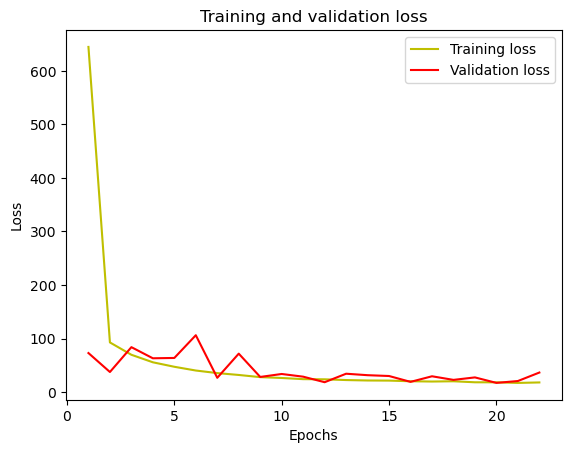

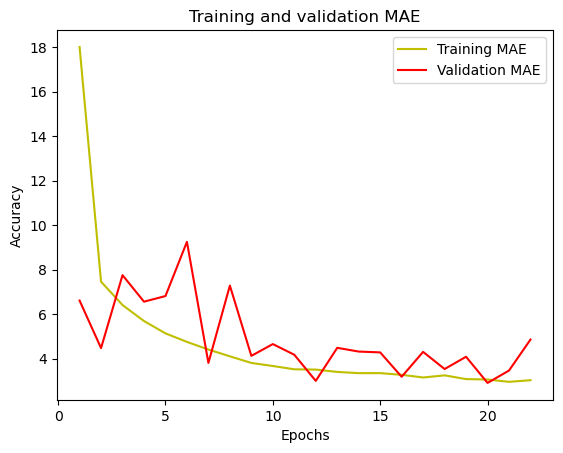

In [93]:
#history.history.keys()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"y",label="Training loss")
plt.plot(epochs, val_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history.history["mae"]
val_acc = history.history["val_mae"]
plt.plot(epochs,acc,"y",label="Training MAE")
plt.plot(epochs, val_acc, "r", label = "Validation MAE")
plt.title("Training and validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test,verbose=0)
y_pred_neural = model.predict(X_test_scaled)
r2_neural = r2_score(y_test,y_pred_neural)

print("Mean squared error from NN: ", mse_neural)
print("Mean absolute error from NN: ", mae_neural)
print("R2 score from NN: ", r2_neural)


NOX_table.loc[len(NOX_table)] = ["NN",mse_neural,mae_neural,r2_neural]

Mean squared error from NN:  41.164527893066406
Mean absolute error from NN:  5.1846022605896
R2 score from NN:  0.42148952554617636


#### Linear Regression Model

In [95]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean squared error from LR: ", mse_lr)
print("Mean absolute error from LR: ", mae_lr)
print("R2 Score", r2_lr)


NOX_table.loc[len(NOX_table)] = ["LR",mse_lr,mae_lr,r2_lr]


Mean squared error from LR:  27.1746875995553
Mean absolute error from LR:  3.7909680897369684
R2 Score 0.6180973148510707


#### NOX Decision Tree

In [96]:
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)

y_pred_dt = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test,y_pred_dt)

print("Mean squared error from DT: ", mse_dt)
print("Mean absolute error from DT: ", mae_dt)
print("R2 score from DT",r2_dt)


NOX_table.loc[len(NOX_table)] = ["DT",mse_dt,mae_dt,r2_dt]

Mean squared error from DT:  15.297362681683898
Mean absolute error from DT:  2.4493611521418015
R2 score from DT 0.7850167048865095


#### NOX Random Forest

In [97]:
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
r2_RF = r2_score(y_test, y_pred_RF)

print("Mean squared error from RF: ", mse_RF)
print("Mean absolute error from RF: ", mae_RF)
print("R2 score from RF",r2_RF)

NOX_table.loc[len(NOX_table)] = ["RF",mse_RF,mae_RF,r2_RF]

Mean squared error from RF:  8.570509789950762
Mean absolute error from RF:  1.9455797636632197
R2 score from RF 0.8795533273423557


#### Nox Table

In [98]:
#Scatter index
NOX_table["SI"] = 0;
NOX = data["Nox"];

for model in NOX_table["Model"]:
    SI = round(sqrt(NOX_table.loc[NOX_table["Model"]==model]["MSE"] / NOX.mean() *100),2);
    NOX_table["SI"].loc[NOX_table["Model"]==model] = SI;

c:\Users\georg\anaconda3\envs\tdaf-tf2p7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [99]:
NOX_table

,Model,MSE,MAE,R2,SI
0,NN,41.164528,5.184602,0.421490,8.34
1,LR,27.174688,3.790968,0.618097,6.78
2,DT,15.297363,2.449361,0.785017,5.09
3,RF,8.570510,1.945580,0.879553,3.81


#### Comparing the Models:
4 models for each response variable have been created and the accuracy of each have been calculated using certian metrics

In [100]:
print(CO_table)
print(NOX_table)

  Model       MSE       MAE        R2    SI
0    NN  0.240595  0.341458  0.794861  3.56
1    LR  0.409288  0.457536  0.651028  4.64
2    DT  0.443235  0.414006  0.622083  4.83
3    RF  0.217908  0.301386  0.814204  3.39
  Model        MSE       MAE        R2    SI
0    NN  41.164528  5.184602  0.421490  8.34
1    LR  27.174688  3.790968  0.618097  6.78
2    DT  15.297363  2.449361  0.785017  5.09
3    RF   8.570510  1.945580  0.879553  3.81


There is a clear winner in all accuracy metrics for the Nox varaible.

The Random forest model had a MSE of half the next best model and a top r2 score of almost 90% as well as the best MAE.